# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [9]:
# Import the class
import yaml

from xopt import Xopt

In [10]:
!mkdir temp

A subdirectory or file temp already exists.


The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [11]:
# Make a proper input file. 
YAML="""
xopt: {}
generator:
    name: random

evaluator:
    name: test_TNK
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [12]:
# create Xopt object
X = Xopt(config=yaml.safe_load(YAML))



# Run Random data generation

In [13]:
# Take one step (generate a single point)
X.step()

In [14]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,1.757537,1.922947,dummy_constant,1.757537,1.757537,1.922947,5.711387,3.606177,"[1, 2, 3]",False,


In [15]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,1.757537,1.922947,dummy_constant,1.757537,1.757537,1.922947,5.711387,3.606177,"[1, 2, 3]",False,
2,2.877787,0.358340,dummy_constant,2.877787,2.877787,0.358340,7.450048,5.673940,"[1, 2, 3]",False,
3,2.453365,0.485950,dummy_constant,2.453365,2.453365,0.485950,5.355139,3.815832,"[1, 2, 3]",False,
4,1.477776,2.438408,dummy_constant,1.477776,1.477776,2.438408,7.205678,4.713473,"[1, 2, 3]",False,
5,2.981470,0.184916,dummy_constant,2.981470,2.981470,0.184916,7.868578,6.256971,"[1, 2, 3]",False,
6,3.065569,0.529014,dummy_constant,3.065569,3.065569,0.529014,8.769380,6.582985,"[1, 2, 3]",False,
7,2.093836,0.457224,dummy_constant,2.093836,2.093836,0.457224,3.688787,2.542143,"[1, 2, 3]",False,
8,2.819999,1.987454,dummy_constant,2.819999,2.819999,1.987454,10.994556,7.594917,"[1, 2, 3]",False,
9,1.933462,0.049955,dummy_constant,1.933462,1.933462,0.049955,2.649192,2.257354,"[1, 2, 3]",False,
10,1.852856,2.910068,dummy_constant,1.852856,1.852856,2.910068,10.995400,7.638649,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

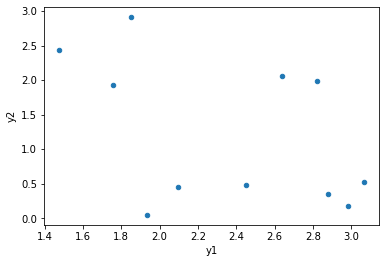

In [16]:
import matplotlib.pyplot as plt
X.data.plot(*X.vocs.objective_names, kind='scatter')

In [17]:
# Cleanup
!rm -r temp

'rm' is not recognized as an internal or external command,
operable program or batch file.
